In [2]:
import numpy as np
import pandas as pd
import pickle 

In [3]:
df=pd.read_csv('Customer-Churn-Records.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
print(df.shape)

(10000, 18)


In [6]:
df.drop(['Complain','Satisfaction Score','Card Type','Point Earned'],inplace=True,axis=1)

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
print(df.shape)

(10000, 14)


In [9]:
df.drop(['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
print(df.shape)

(10000, 11)


In [12]:
df.duplicated().sum()

0

In [13]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [15]:
df['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

In [16]:
df=pd.get_dummies(df,['Geography','Gender'],drop_first=True)

In [17]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [18]:
x=df.drop(['Exited'],axis=1)
y=df['Exited']
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)

In [19]:
x_train.shape,x_test.shape

((8000, 11), (2000, 11))

In [20]:
y_train.shape,y_test.shape

((8000,), (2000,))

In [45]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6252,596,32,3,96709.07,2,0,0,41788.37,1,0,1
4684,623,43,1,0.00,2,1,1,146379.30,0,0,1
1731,601,44,4,0.00,2,1,0,58561.31,0,1,0
4742,506,59,8,119152.10,2,1,1,170679.74,1,0,1
4521,560,27,7,124995.98,1,1,1,114669.79,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6412,602,53,5,98268.84,1,0,1,45038.29,1,0,0
8285,609,25,10,0.00,1,0,1,109895.16,0,0,1
7853,730,47,7,0.00,1,1,0,33373.26,0,0,0
1095,692,29,4,0.00,1,1,0,76755.99,0,0,1


In [57]:
df['EstimatedSalary'].min()

11.58

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [23]:
x_train_scaled.shape[1]

11

In [24]:
x_test_scaled.shape[0]

2000

In [25]:
import tensorflow
from tensorflow import keras

In [26]:
from keras.models import Sequential
from keras.layers import Dense

In [27]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=x_train_scaled.shape[1]))
model.add(Dense(50,activation='relu'))

In [28]:
model.add(Dense(1,activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 50)                600       
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 783
Trainable params: 783
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [31]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.5125 - accuracy: 0.7738 - val_loss: 0.4485 - val_accuracy: 0.7987
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8059 - val_loss: 0.4248 - val_accuracy: 0.8175
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4254 - accuracy: 0.8202 - val_loss: 0.4132 - val_accuracy: 0.8275
Epoch 4/100
200/200 [==============================] - 0s 3ms/step - loss: 0.4116 - accuracy: 0.8256 - val_loss: 0.4041 - val_accuracy: 0.8319
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8292 - val_loss: 0.3870 - val_accuracy: 0.8400
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3779 - accuracy: 0.8477 - val_loss: 0.3707 - val_accuracy: 0.8462
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3631 - accuracy: 0.8525 - val_loss: 0.3657 - val_accuracy: 0.8475

Epoch 58/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3147 - accuracy: 0.8684 - val_loss: 0.3462 - val_accuracy: 0.8581
Epoch 59/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3145 - accuracy: 0.8680 - val_loss: 0.3451 - val_accuracy: 0.8575
Epoch 60/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3131 - accuracy: 0.8694 - val_loss: 0.3450 - val_accuracy: 0.8556
Epoch 61/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3133 - accuracy: 0.8694 - val_loss: 0.3457 - val_accuracy: 0.8550
Epoch 62/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3134 - accuracy: 0.8691 - val_loss: 0.3462 - val_accuracy: 0.8550
Epoch 63/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3135 - accuracy: 0.8711 - val_loss: 0.3447 - val_accuracy: 0.8581
Epoch 64/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8711 - val_loss: 0.3455 - val_accuracy:

In [32]:
model.layers[0].get_weights()

[array([[-6.16412044e-01,  4.10829604e-01,  1.77448601e-01,
         -4.24928427e-01,  9.41428244e-02,  6.65390417e-02,
         -6.40250668e-02,  2.33558580e-01,  4.54559356e-01,
         -6.79813564e-01, -3.88309419e-01],
        [ 3.76158059e-01, -9.87503976e-02, -8.60320032e-01,
          5.92286348e-01,  6.04583502e-01, -1.49504751e-01,
         -3.94729614e-01,  1.59165382e-01, -4.42777872e-02,
         -5.25984168e-01, -5.32053351e-01],
        [-7.98298895e-01, -3.80870104e-01,  6.67172577e-03,
          3.49747211e-01, -1.41039282e-01,  1.56115636e-01,
         -1.05766661e-01, -7.68458024e-02, -1.88032106e-01,
          1.63540870e-01, -9.24396738e-02],
        [-2.36860871e-01, -2.68972278e-01, -4.28640395e-02,
         -1.51222176e-03, -4.58734274e-01, -7.58307576e-01,
          4.16252874e-02,  2.60520689e-02,  2.07791552e-01,
         -3.83324735e-02, -2.48401597e-01],
        [ 2.51343548e-01, -2.94346243e-01,  9.70093757e-02,
         -5.55646777e-01, -1.26093760e-01, -

In [33]:
model.layers[1].get_weights()

[array([[-9.18120742e-01, -5.72699726e-01, -3.60149443e-02,
          2.44406074e-01,  3.22603166e-01,  2.05236629e-01,
         -2.31547020e-02, -7.57515356e-02,  1.82367060e-02,
         -7.53370300e-02,  5.43769240e-01, -1.05812930e-01,
          5.02754986e-01,  3.90857086e-03,  1.54823601e-01,
         -1.13545597e-01, -2.10168496e-01, -6.67788804e-01,
         -1.80861235e-01,  2.09820241e-01, -7.28533089e-01,
         -4.02268410e-01,  3.69525403e-01, -4.50893402e-01,
         -2.00501502e-01, -1.76946819e-01,  3.76793653e-01,
          8.19616467e-02, -9.63088199e-02, -1.79140717e-01,
          1.04552381e-01, -7.84409121e-02,  2.25002408e-01,
         -2.15086460e-01,  1.91807568e-01, -1.18174779e+00,
          3.25853586e-01,  3.90156239e-01, -4.19323184e-02,
         -1.37530461e-01, -1.03612030e-02, -3.77399921e-02,
         -3.65791798e-01, -1.26785710e-01, -9.50048506e-01,
         -9.97623354e-02,  3.15550297e-01,  3.02484572e-01,
         -7.27595389e-01,  2.57807225e-0

In [34]:
y_log=model.predict(x_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [61]:
y_log

array([[0.02674461],
       [0.01513857],
       [0.08922055],
       ...,
       [0.5951035 ],
       [0.09386935],
       [0.24823132]], dtype=float32)

In [35]:
y_pred=np.where(y_log>0.5,1,0)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
print(accuracy_score(y_pred,y_test))

0.8545


In [38]:
import matplotlib.pyplot as plt

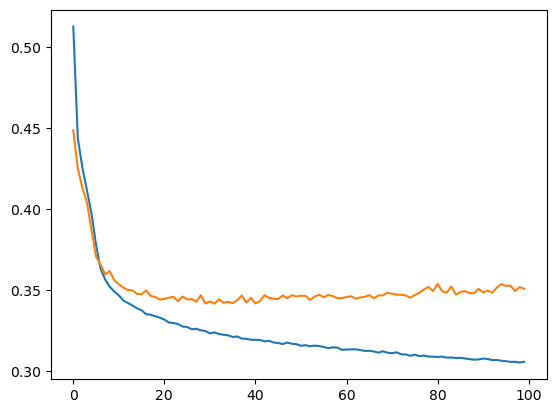

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

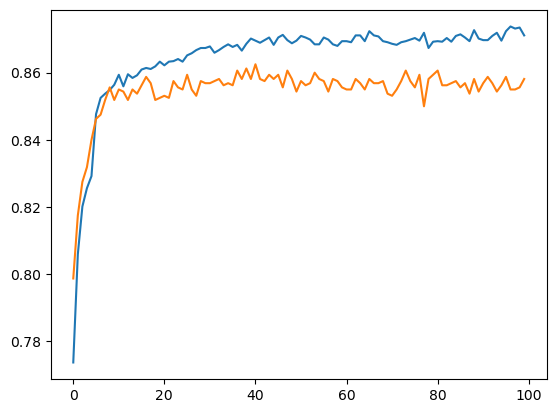

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [60]:
model.save('model_churn.h5')